In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
stock = pd.read_csv("F:\\PROGRAMMING\\Python\\Project\\Stock Prediction\\Stock Prediction.csv")
stock.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,08-10-2018,208.00,222.25,206.85,216.00,215.15,4642146,10062.83
1,05-10-2018,217.00,218.60,205.90,210.25,209.20,3519515,7407.06
2,04-10-2018,223.50,227.80,216.15,217.25,218.20,1728786,3815.79
3,03-10-2018,230.00,237.50,225.75,226.45,227.60,1708590,3960.27
4,01-10-2018,234.55,234.60,221.05,230.30,230.90,1534749,3486.05


In [3]:
del stock['Date']

In [4]:
stock.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,1235.000000,1235.000000,1235.000000,1235.000000,1235.000000,1.235000e+03,1235.000000
mean,168.954858,171.429069,166.402308,168.736356,168.731053,2.604151e+06,4843.166502
std,51.499145,52.436761,50.542919,51.587384,51.544928,2.277028e+06,5348.919832
min,103.000000,104.600000,100.000000,102.600000,102.650000,1.001800e+05,128.040000
25%,137.550000,138.925000,135.250000,137.175000,137.225000,1.284482e+06,1801.035000
50%,151.500000,153.250000,149.500000,151.200000,151.100000,1.964885e+06,3068.510000
75%,169.000000,172.325000,166.700000,169.100000,169.500000,3.095788e+06,5852.600000
max,327.700000,328.750000,321.650000,325.950000,325.750000,2.919102e+07,55755.080000


In [5]:
stock.isnull().sum()

Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

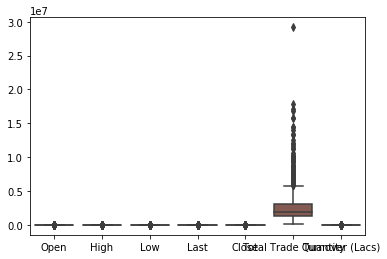

In [6]:
sns.boxplot(data=stock)

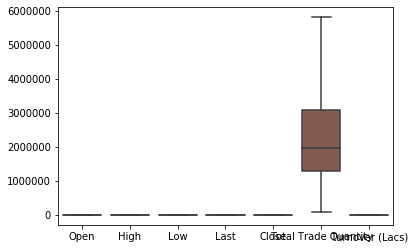

In [7]:
def outlier_detect(df):
    for i in df.describe().columns:
        Q1=df.describe().at['25%',i]
        Q3=df.describe().at['75%',i]
        IQR=Q3-Q1
        LTV=Q1-1.5*IQR
        UTV=Q3+1.5*IQR
        df[i]=df[i].mask(df[i]<LTV,LTV)
        df[i]=df[i].mask(df[i]>UTV,UTV)
    return df
stock = outlier_detect(stock)
sns.boxplot(data=stock)

In [8]:
stock =(stock-stock.min())/(stock.max() - stock.min())
stock.head()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,0.927767,0.998515,0.938310,0.991367,0.976033,0.795083,0.841795
1,1.000000,0.967537,0.929967,0.941099,0.924412,0.598563,0.616766
2,1.000000,1.000000,1.000000,1.000000,1.000000,0.285092,0.312471
3,1.000000,1.000000,1.000000,1.000000,1.000000,0.281556,0.324713
4,1.000000,1.000000,1.000000,1.000000,1.000000,0.251125,0.284531


In [9]:
y = stock.iloc[:,-1:]
y.head()

,Turnover (Lacs)
0,0.841795
1,0.616766
2,0.312471
3,0.324713
4,0.284531


In [10]:
X = stock.iloc[:,0:6]
X.head()

,Open,High,Low,Last,Close,Total Trade Quantity
0,0.927767,0.998515,0.938310,0.991367,0.976033,0.795083
1,1.000000,0.967537,0.929967,0.941099,0.924412,0.598563
2,1.000000,1.000000,1.000000,1.000000,1.000000,0.285092
3,1.000000,1.000000,1.000000,1.000000,1.000000,0.281556
4,1.000000,1.000000,1.000000,1.000000,1.000000,0.251125


In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

In [12]:
from sklearn.linear_model import LinearRegression
l = LinearRegression()
l.fit(X_train,y_train)
linear = l.predict(X_test)

In [13]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test,linear))
rmse

0.05262590289817122

In [14]:
from sklearn.metrics import r2_score
Linear_Regression = r2_score(y_test,linear)
Linear_Regression

0.9621531228843719

# SGD Regression Algrothim

In [15]:
from sklearn.linear_model import SGDRegressor
sgd=SGDRegressor()
sgd.fit(X_train,y_train)

C:\Users\mayur\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [16]:
sgd=sgd.predict(X_test)

In [17]:
SGD_Regression = r2_score(y_test,sgd)
SGD_Regression

0.8408327937852118

# Ridge Regression Algrothim

In [18]:
# Importing Ridge Regression
from sklearn.linear_model import Ridge

# Model Bulding
ridgeReg = Ridge(alpha=0.5, normalize=True)

# Fitting Model
ridgeReg.fit(X_train,y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

In [19]:
# Predicting the test set variables
ridge = ridgeReg.predict(X_test)

In [20]:
Ridge_Regression = r2_score(y_test,ridge)
Ridge_Regression

0.8938821481944845

# Lasso Regression Algrothim

In [21]:
# Importing Lasso Regression
from sklearn.linear_model import Lasso

# Model Bulding
lassoReg = Lasso(alpha=0.1, normalize=True)

# Fitting Model
lassoReg.fit(X_train,y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [22]:
# Predicting the test set variables
lasso = lassoReg.predict(X_test)

In [23]:
Lasso_Regression = r2_score(y_test,lasso)
Lasso_Regression

-0.011524653917217131

# Elastic Net Regression Algorthim

In [24]:
# Importing Elastic Net Regression
from sklearn.linear_model import ElasticNet

# Model Bulding
Elreg = ElasticNet(random_state=0)
        
# Fitting Model
Elreg.fit(X_train,y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=0, selection='cyclic', tol=0.0001, warm_start=False)

In [25]:
# Predicting the test set variables
net = Elreg.predict(X_test)

In [26]:
Elastic_Net_Regression = r2_score(y_test,net)
Elastic_Net_Regression

-0.011524653917217131

# Decision Tree Regression Algorthim

In [27]:
# Importing Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

# Model Building
dtr = DecisionTreeRegressor(max_depth=5,random_state = 0)

# Fitting Model
dtr.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [28]:
# Predicting the test set variables
dt = dtr.predict(X_test)

In [29]:
Decision_Tree_Regression = r2_score(y_test,dt)
Decision_Tree_Regression

0.9720846341965844

# Random Forest Regression Algorthim

In [30]:
# Improting Random Forest Algorthim
from sklearn.ensemble import RandomForestRegressor

# Model Bulding
rfr = RandomForestRegressor(max_depth=5,n_estimators = 10, random_state = 0)

# Fitting Model
rfr.fit(X_train,y_train)

C:\Users\mayur\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [31]:
# Predicting the test set variables
rf = rfr.predict(X_test)

In [32]:
Random_Forest_Regression = r2_score(y_test,rf)
Random_Forest_Regression

0.9827001350606671

# Support Vector Regression Algorthim

In [33]:
# Importing Support Vector Machine Linear Regression
from sklearn.svm import SVR

# Model Building
svml = SVR(kernel = 'linear')

# Fitting Model
svml.fit(X_train, y_train)

C:\Users\mayur\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [34]:
# Predicting the test set variables
svmr = svml.predict(X_test)

In [35]:
SVM_Linear_Regression = r2_score(y_test,svmr)
SVM_Linear_Regression

0.9506354226492131

In [36]:
# Importing Support Vector Machine Gaussion Regression
from sklearn.svm import SVR

# Model Building
svmg = SVR(kernel = 'rbf')

# Fitting Model
svmg.fit(X_train, y_train)

C:\Users\mayur\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mayur\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [37]:
# Predicting the test set variables
svmrg = svmg.predict(X_test)

In [38]:
SVM_Gaussion_Regression = r2_score(y_test,svmrg)
SVM_Gaussion_Regression

0.9448345178642635

In [39]:
# Importing Support Vector Machine Polynomial Regression
from sklearn.svm import SVR

# Model Building
svmp = SVR(kernel = 'poly')

# Fitting Model
svmp.fit(X_train, y_train)

C:\Users\mayur\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mayur\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='poly', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [40]:
# Predicting the test set variables
svmrp = svmp.predict(X_test)

In [41]:
SVM_Polynomial_Regression = r2_score(y_test,svmrp)
SVM_Polynomial_Regression

0.8508611615624234

In [42]:
# Importing Support Vector Machine Sigmoid Regression
from sklearn.svm import SVR

# Model Building
svms = SVR(kernel = 'sigmoid')

# Fitting Model
svms.fit(X_train, y_train)

C:\Users\mayur\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\mayur\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='sigmoid', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [43]:
# Predicting the test set variables
svmrs = svms.predict(X_test)

In [44]:
SVM_Sigmoid_Regression = r2_score(y_test,svmrs)
SVM_Sigmoid_Regression

-82.38295099082784

# XgBoost Regression Algrothim

In [45]:
import xgboost as xgb
xgr = xgb.XGBRegressor(max_depth = 5, n_estimators = 10)
xgr.fit(X_train,y_train)
xg = xgr.predict(X_test)

In [46]:
Xgboost_Regression = r2_score(y_test,xg)
Xgboost_Regression

0.8040558648901245

# Printing R2 Score values

In [47]:
print("Linear Regression",Linear_Regression)
print("SGD Regression",SGD_Regression)
print("Ridge Regression",Ridge_Regression)
print("Lasso Regresion",Lasso_Regression)
print("Elastic Net Regression",Elastic_Net_Regression)
print("Decision Tree Regression",Decision_Tree_Regression)
print("Random Forest Regression",Random_Forest_Regression)
print("SVM Linear",SVM_Linear_Regression)
print("SVM Gaussion_Regression",SVM_Gaussion_Regression)
print("SVM Polynomial Regression",SVM_Polynomial_Regression)
print("SVM Sigmoid Regression",SVM_Sigmoid_Regression)
print("XgBoost Regression",Xgboost_Regression)

Linear Regression 0.9621531228843719
SGD Regression 0.8408327937852118
Ridge Regression 0.8938821481944845
Lasso Regresion -0.011524653917217131
Elastic Net Regression -0.011524653917217131
Decision Tree Regression 0.9720846341965844
Random Forest Regression 0.9827001350606671
SVM Linear 0.9506354226492131
SVM Gaussion_Regression 0.9448345178642635
SVM Polynomial Regression 0.8508611615624234
SVM Sigmoid Regression -82.38295099082784
XgBoost Regression 0.8040558648901245
